[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
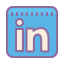
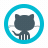

# <span style="color:skyblue">**What is a DAG ?**</span>

In Apache Airflow, a `DAG` (Directed Acyclic Graph) serves as a blueprint for defining and orchestrating complex data workflows. By structuring tasks and their dependencies in a directed acyclic graph, Airflow enables the efficient and reliable execution of data pipelines for various use cases and applications.

### <span style="color:orange">Directed Acyclic Graph (DAG)</span>

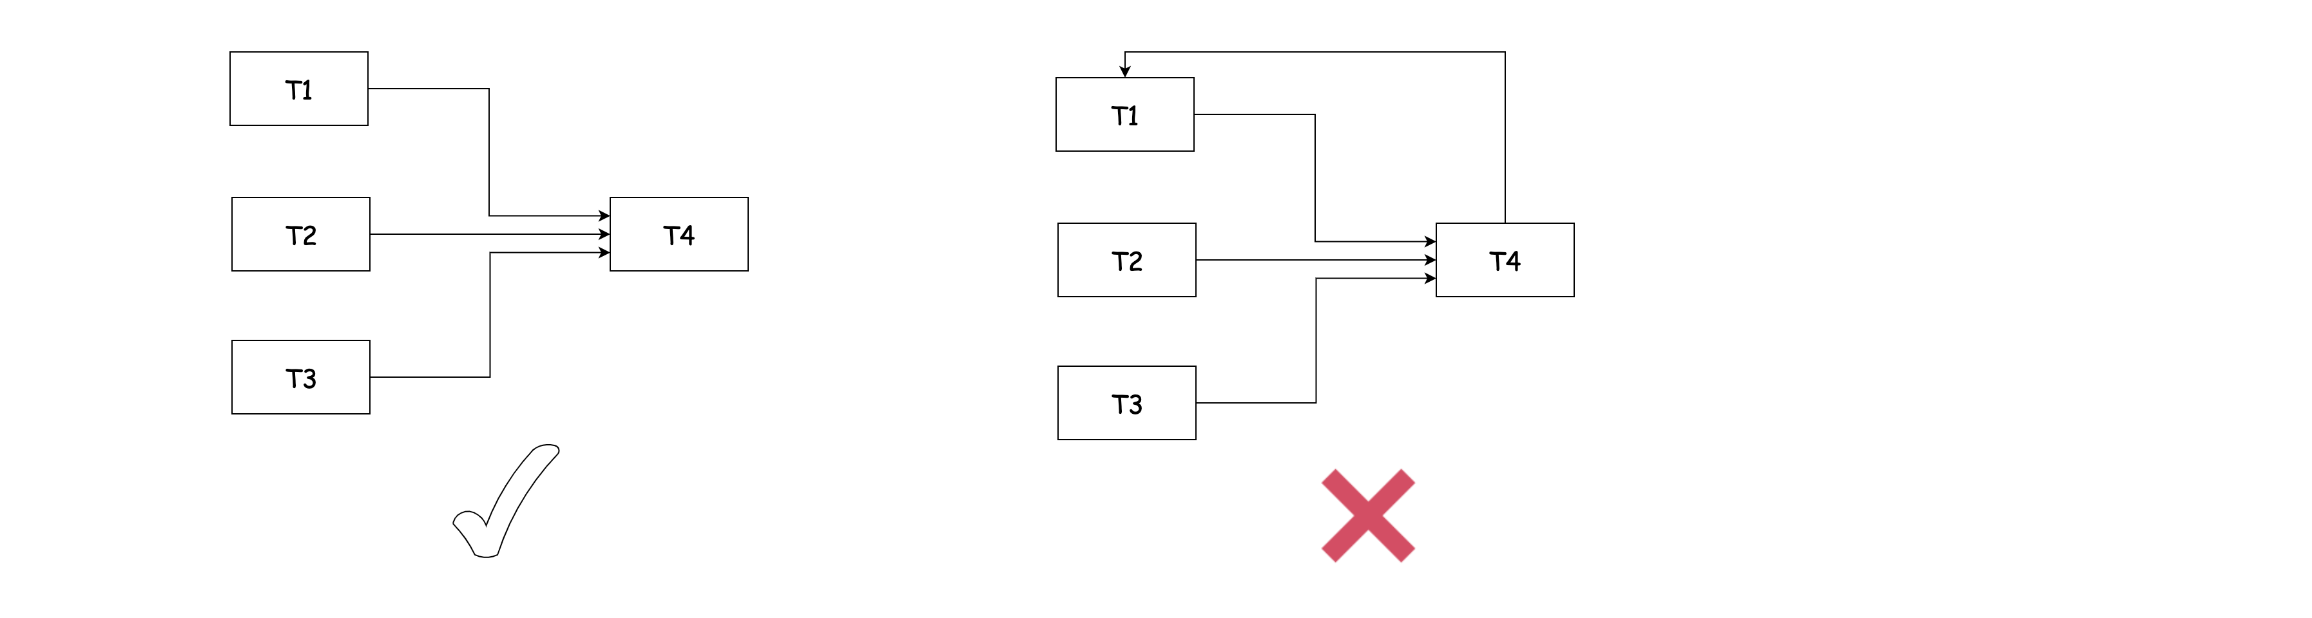

* A `DAG` is a graph data structure where `Nodes` correspond to individual `tasks` that perform specific actions (Such as executing Python code, running a Bash command, or interacting with external systems), and directed `edges` between nodes represent `dependencies` between tasks (Indicating the order in which tasks should be executed).

* The term `directed` implies that, dependencies flow in a specific direction, from one task to another. `acyclic` means that there are `no loops` or cycles in the graph.

* Each task depends on the successful completion of its predecessor tasks, ensuring that tasks are executed in the correct sequence to accomplish the overall workflow.

* Airflow's `scheduler` manages the execution of tasks within a DAG based on their dependencies and predefined schedule intervals. Tasks can be triggered manually, scheduled to run at specific times, or initiated in response to external events or data availability.

# <span style="color:skyblue">**Define a DAG**</span>

### <span style="color:orange">Create a DAG Object</span>

Each time we want to create a data pipeline in airflow, We have to create a `python` file, like `forex_data_pipeline.py` here.

In the Python file, We typically start by importing the `DAG` object from the `airflow` module.

```python
from airflow import DAG
```

With this import statement, We gain access to the `DAG` class provided by Airflow. This allows us to create a `DAG` object, which represents our data pipeline.

```python
from datetime import datetime, timedelta 

default_args = {
    "owner": "suryakant",
    "email_on_failure": False,
    "email_on_retry": False,
    "email": "suryakant.kumar@icloud.com",
    "retries": 1,
    "retry_delay": timedelta(minutes=5)
}

with DAG(dag_id="forex_data_pipeline",
         start_date=datetime(2024, 2, 20),
         schedule_interval="@daily",
         default_args=default_args,
         catchup=False) as dag:
```

Here, We have created a `DAG` object with the necessary parameters :

* **`dag_id`** : This is unique identifier for the DAG. It must be unique across all available DAGs in Airflow.

* **`start_date`** : The date from which the DAG will start being scheduled.

* **`schedule_interval`** : The frequency at which the DAG should be triggered. Here, `"@daily"` means the DAG runs daily at midnight.

* **`default_args`** : A dictionary containing default arguments for our DAG, such as :

    * **`owner`** : Owner of the DAG

    * **`email_on_failure`** : It specifies if the owner wants to receive mail on DAG failure or not. Values can be `True` or `False`

    * **`email_on_retry`** : It specifies if the owner wants to receive mail when DAG retries to run or not. Values can be `True` or `False`

    * **`email`** : Email Id to the owner of the DAG

    * **`retries`** : Number of retries for failed tasks

    * **`retry_delay`** : Delay before retrying the failed tasks

* **`catchup`** : It determines whether Airflow should `backfill` and execute any missing `DAG runs` upon DAG instantiation. Setting it to `False` skips backfilling (Prevent Airflow from running all the non-triggered DAG runs between the `current` date and the `start` date.)

Once we have instantiated the DAG object with the parameters, We can proceed to add tasks to our DAG and define their dependencies within the context of this DAG object.